# HOG feature

In [1]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt


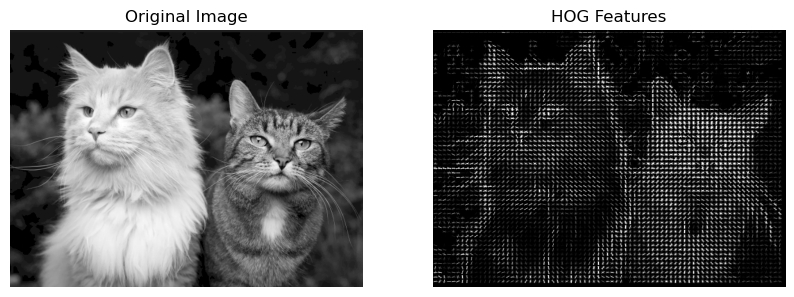

In [2]:
image = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)

# Calculate HOG features
features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Rescale HOG features for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the original image and HOG features
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.title('HOG Features')
plt.axis('off')
plt.savefig('shift.webp')
plt.show()

# SIFT

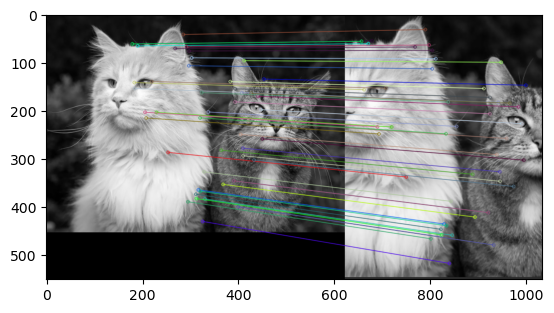

In [8]:
img1 = cv2.imread('cat.png')  
img2 = cv2.imread('cat_compare.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3)
plt.show()

# Har like

In [12]:

img = cv2.imread('people.png') 

# Converting image to grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray Image', gray)

# Load Haar Cascade Classifier
haar_cascade = cv2.CascadeClassifier('haar_face.xml')

# Detect faces in the image
faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)
print(f'Number of faces found = {len(faces_rect)}')

# Draw rectangles around the detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)



plt.imshow(img) 

plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'
